**Set up working environment, data zip file has been uploaded in google drive**

In [1]:
# setup access to google drive to store dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# upzip file
import os
project_path = "/content/gdrive/My Drive/kaggle/SignLanguage"
os.chdir(project_path)
# !unzip sign.zip

**Walkthrough**

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

import string
from tensorflow.keras import layers, models

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.3.0
Num GPUs Available:  1


In [5]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


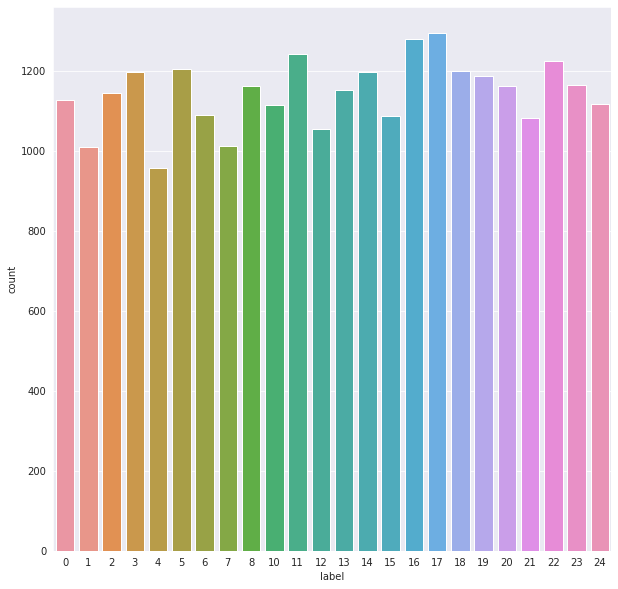

In [6]:
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(train_df['label'])
# balanced dataset, no cases for 9=J and 25=Z because of gesture motion

In [7]:
class_names = list(string.ascii_uppercase)

In [8]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [9]:
x_train = train_df.values
x_test = test_df.values

In [10]:
# Normalize the pixel data
x_train = x_train / 255
x_test = x_test / 255

In [11]:
x_train.shape, x_test.shape

((27455, 784), (7172, 784))

In [12]:
y_train.shape, y_test.shape

((27455,), (7172,))

In [13]:
# Reshaping the data from 1-D to 3-D as required input by CNN's
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train.shape, x_test.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

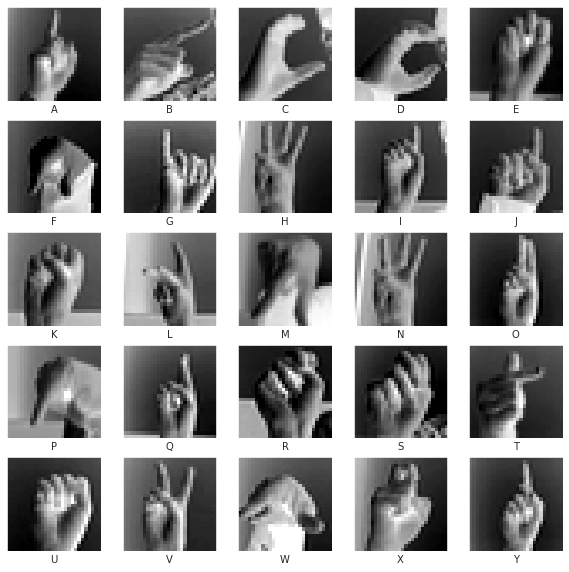

In [14]:
# Preview first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i].reshape(28,28), cmap=plt.cm.binary)
  plt.xlabel(class_names[i])
plt.show()

In [15]:
# Create the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [17]:
# add dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(25))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [19]:
# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
858/858 [==============================] - 3s 4ms/step - loss: 1.0640 - accuracy: 0.6769 - val_loss: 0.5699 - val_accuracy: 0.8126
Epoch 2/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0893 - accuracy: 0.9781 - val_loss: 0.3951 - val_accuracy: 0.9041
Epoch 3/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0289 - accuracy: 0.9932 - val_loss: 0.3723 - val_accuracy: 0.9250
Epoch 4/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0203 - accuracy: 0.9943 - val_loss: 0.4066 - val_accuracy: 0.9084
Epoch 5/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0146 - accuracy: 0.9960 - val_loss: 0.4579 - val_accuracy: 0.8943
Epoch 6/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0050 - accuracy: 0.9988 - val_loss: 0.3604 - val_accuracy: 0.9321
Epoch 7/10
858/858 [==============================] - 3s 3ms/step - loss: 2.0932e-04 - accuracy: 1.0000 - val_loss: 0.3851 - val_accuracy: 0.9336
Ep

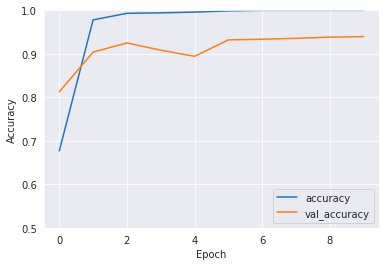

In [20]:
# Evaludate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

**Combat overfitting**

In [21]:
# Use Dropout layers
model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.Dropout(0.2),
            layers.Flatten(), 
            layers.Dense(64, activation='relu'),
            layers.Dense(25)
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
history_dropout = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
858/858 [==============================] - 3s 4ms/step - loss: 1.1586 - accuracy: 0.6380 - val_loss: 0.4927 - val_accuracy: 0.8470
Epoch 2/10
858/858 [==============================] - 3s 3ms/step - loss: 0.1513 - accuracy: 0.9508 - val_loss: 0.2902 - val_accuracy: 0.9190
Epoch 3/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0562 - accuracy: 0.9832 - val_loss: 0.3313 - val_accuracy: 0.9067
Epoch 4/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0331 - accuracy: 0.9899 - val_loss: 0.3556 - val_accuracy: 0.9304
Epoch 5/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0257 - accuracy: 0.9917 - val_loss: 0.3652 - val_accuracy: 0.9265
Epoch 6/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0188 - accuracy: 0.9939 - val_loss: 0.3046 - val_accuracy: 0.9398
Epoch 7/10
858/858 [==============================] - 3s 4ms/step - loss: 0.0176 - accuracy: 0.9947 - val_loss: 0.2753 - val_accuracy: 0.9424
Epoch 